# Iris Flowers Analysis and Prediction

# History of Iris Dataset

The *Iris flower data set* or Fisher’s Iris data set is a multivariate data set introduced by the British statistician and biologist *Ronald Fisher* in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. 

![Sir Ronald Aylmer Fisher (17 February 1890 – 29 July 1962)](https://github.com/okkymabruri/data-analysis-projects/raw/master/EDA-iris/image/Ronald-Fisher.jpeg)


The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. 

![Iris Flower](https://github.com/okkymabruri/data-analysis-projects/raw/master/EDA-iris/image/iris-flower.png)



# Preparing Data

## Import Iris Flower Dataset

In [1]:
# Matplotlib is plotting library for the Python programming language
import matplotlib.pyplot as plt

# numpy is multi-dimensional arrays and matrices library
import numpy as np

# Pandas is data analysis and manipulation tool
import pandas as pd

# Seaborn is python data visualization library based on matplotlib
import seaborn as sns

In [2]:
# ls ./data/ # check yout dataset

iris.csv*  iris.sqlite*


In 'data/' folder, there are two data format. You can choose sql or csv. (I am prever use csv, but if you want use sql, I give the code below

```
# To read data use sqlite
import sqlite3
iris = pd.read_sql('SELECT * FROM iris', sqlite3.connect('./data/iris.sqlite'))
```

## Read Iris Dataset

In [3]:
# pandas read the csv file and store to iris
iris = pd.read_csv("./data/iris.csv")
# print the first 5 rows from the dataset
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.info()
# checking the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The data set contain 150 rows and 6 column (Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and Species). In addition, there is nothing missing value

In [5]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We know that each species has 50 samples.

Description :
* The dataset provided has 150 rows
* Dependent Variables : Sepal Length, Sepal Width, Petal Length, Petal Width
* Independent/Target Variable : Class
* Missing Values : 0

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      * Iris Setosa
      * Iris Versicolour
      * Iris Virginica

# Exploratory Data Analysis

In [7]:
iris.drop("Id", axis=1, inplace=True)
iris
# drop the Id column

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


We remove Id column because we dont need it.

• `axis = 1` specifies that it should be column wise,

• `inplace = True` returns `None`. `inplace = False` returns a copy of the object with the operation performed

So. The next step is we want to know the distribution of the dependent variable

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

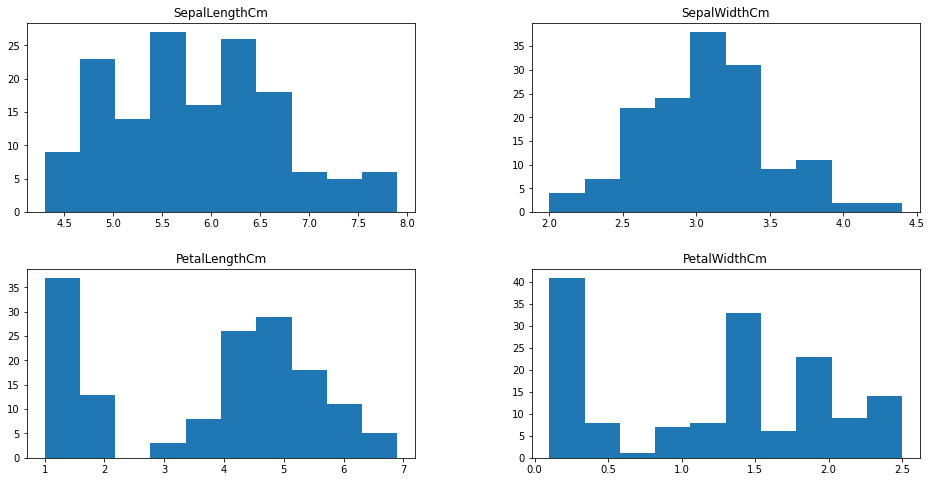

In [8]:
iris.hist(figsize=(16, 8), grid=0)

Histogram: A visual representation of how the data points are distributed with respect to the frequency.

Looking at the overall distribution, petal length and petal width does not have a normal distribution, whereas sepal length and sepal width are uniformly distributed.

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

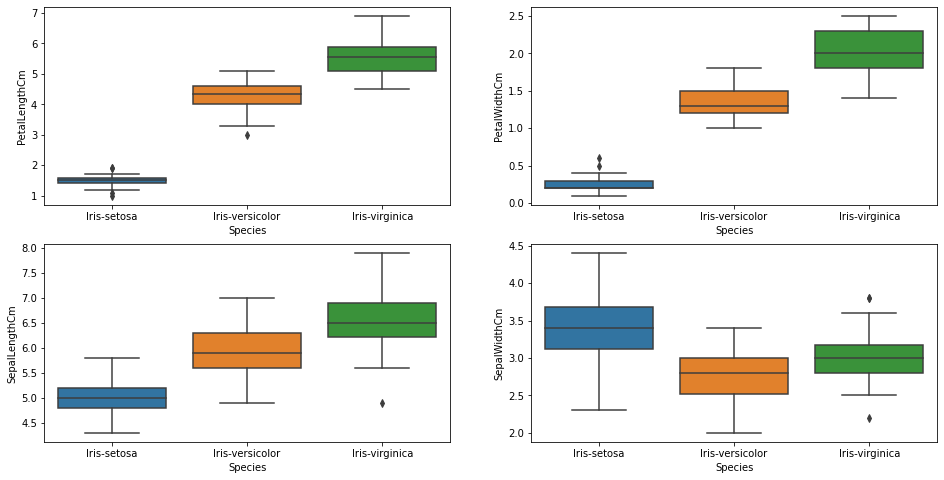

In [9]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

Box Plot: A box plot is a way of summarizing a set of data measured on an interval scale. It is often used in explanatory data analysis. The ends of the box are the upper and lower quartiles, so the box spans the interquartile range and the median is marked by a vertical line inside the box.

The boxplot also benefits us with the information on outliers. An outlier is an observation that is numerically distant from the rest of the data.

From the below box plot it’s clear sighted that the Sepal Length for virginica and Sepal Width of Setosa both have outliers (They are the dots that out run the whiskers). While all the other boxplots looked perfectly balanced, we can see that that petal width for both setosa and versicolor are positively skewed as the median lie at the lower end of the boxplot.


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

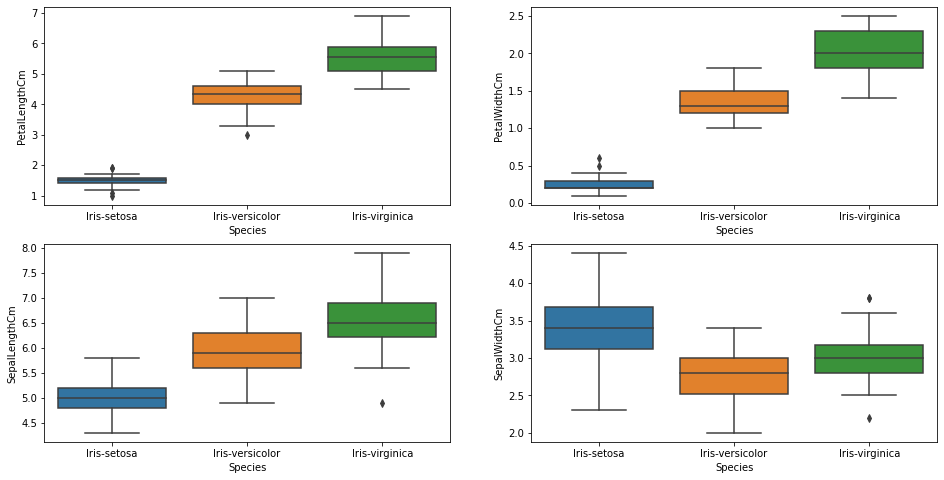

In [10]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

/home/om/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


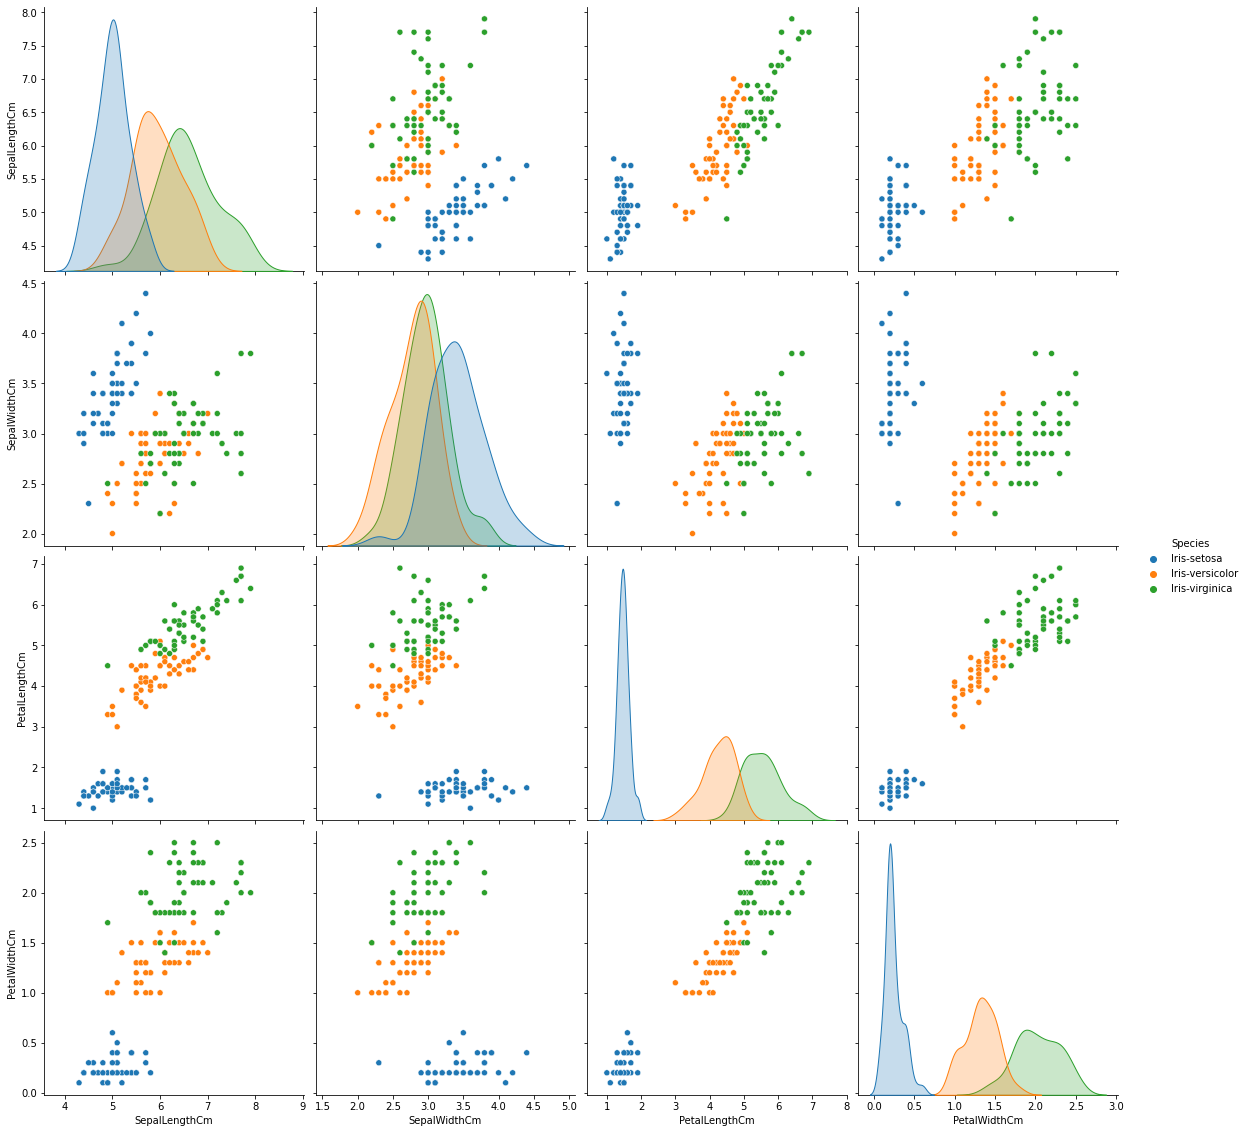

In [11]:
sns.pairplot(iris, hue="Species", kind="scatter", size=4)

Scatter Plot: Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. The relationship between two variables is called their correlation.

From the above plot, there seems to be a positive correlation between the length and width of all the species, however there is a distinguishing strong correlation and relationship between petal length and petal width.

<AxesSubplot:>

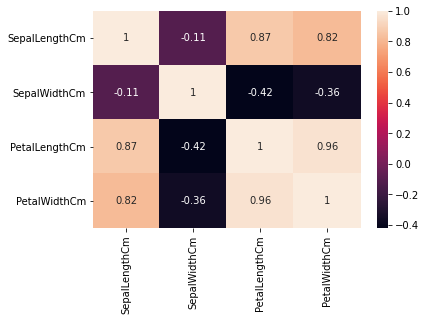

In [12]:
sns.heatmap(iris.corr(), annot=True)

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

<AxesSubplot:>

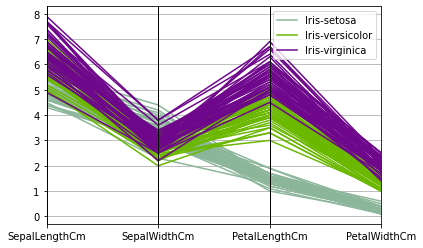

In [13]:
# multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample


from pandas.plotting import parallel_coordinates

parallel_coordinates(iris, "Species")

<AxesSubplot:>

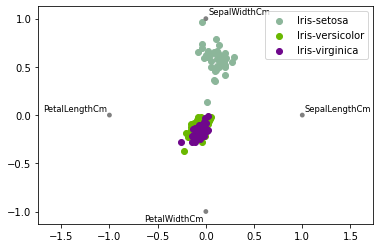

In [14]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz

radviz(iris, "Species")

# Prediction

In [15]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

train, test = train_test_split(
    iris, test_size=0.3, stratify=iris["Species"], random_state=42
)
X_train = train[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y_train = train.Species
X_test = test[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y_test = test.Species

In [16]:
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
mod_dt.fit(X_train, y_train)
prediction = mod_dt.predict(X_test)

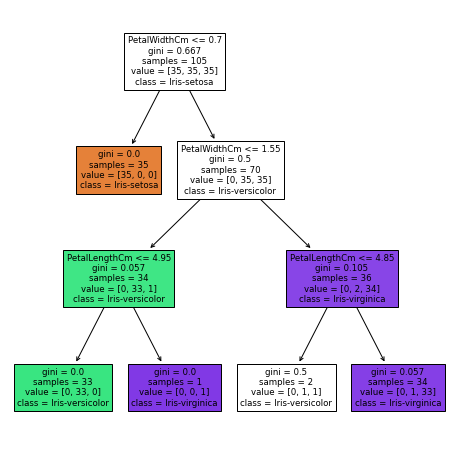

In [17]:
plt.figure(figsize=(8, 8))
fn = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
cn = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plot_tree(mod_dt, feature_names=fn, class_names=cn, filled=True);

# Predict the species of the iris flower.